


<center><b>©Content is made available under the CC-BY-NC-ND 4.0 license. Christian Lopez, lopezbec@lafayette.edu<b><center>

<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/lopezbec/intro_python_notebooks/blob/master/Logistic_Regression_as_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
  <td>

# Logistic Regression with a Neural Network mindset


 This Notebook will give give you an introduciton of Neural Network by implementing  Logistics Regression with a Neural Network mindset. In this notebook will build a logistic regression classifier to recognize  cats. This assignment will step you through how to do this with a Neural Network mindset, and so will also hone your intuitions about Neural Networks.
<br></br>


Most of the notebooks we are going to be using are inspired from existing notebooks that are available online and are made  free for educational purposes. The work of [Andre Ng]( https://en.wikipedia.org/wiki/Andrew_Ng)  and others served as guide and  inspiration for these notebooks. Nonetheless, these notebooks should not be share without prior permission of the instructor. When working in an assignment always remember the [Student Code of Conduct]( https://conduct.lafayette.edu/student-handbook/student-code-of-conduct/).  
</br>


### Setup

First, let's run the cell below to import all the packages that you will need during this assignment.
- [numpy](www.numpy.org) is the fundamental package for scientific computing with Python.
- [h5py](http://www.h5py.org) is a common package to interact with a dataset that is stored on an H5 file.
- [matplotlib](http://matplotlib.org) is a famous library to plot graphs in Python.
- [PIL](http://www.pythonware.com/products/pil/) and [scipy](https://www.scipy.org/) are used here to test your model with your own picture at the end.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage
!pip install Pillow
from PIL import Image
import imageio

%matplotlib inline
!wget https://raw.githubusercontent.com/lopezbec/intro_python_notebooks/main/Data_LogRNN/test_catvnoncat.h5
!wget https://raw.githubusercontent.com/lopezbec/intro_python_notebooks/main/Data_LogRNN/train_catvnoncat.h5
!wget https://raw.githubusercontent.com/lopezbec/intro_python_notebooks/main/Data_LogRNN/cat.jpg
!wget https://raw.githubusercontent.com/lopezbec/intro_python_notebooks/main/Data_LogRNN/cat2.jpg

## 1 - Overview of the Problem set ##

**Problem Statement**: You are given a dataset ("data.h5") containing:

- a training set of m_train images labeled as cat (y=1) or non-cat (y=0)

- a test set of m_test images labeled as cat or non-cat
    
- each image is of shape (num_px, num_px, 3) where 3 is for the 3 channels (RGB). Thus, each image is square (height = num_px) and (width = num_px).


You will build a simple image-recognition algorithm that can correctly classify pictures as cat or non-cat.

Let's get more familiar with the dataset. Load the data by running the following code.

In [ ]:
train_dataset = h5py.File('train_catvnoncat.h5', "r")
train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels

test_dataset = h5py.File('test_catvnoncat.h5', "r")
test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels

classes = np.array(test_dataset["list_classes"][:]) # the list of classes

train_set_y_orig = train_set_y_orig.reshape(( train_set_y_orig.shape[0],1))
test_set_y_orig = test_set_y_orig.reshape(( test_set_y_orig.shape[0],1))

We added "_orig" at the end of image datasets (train and test) because we are going to preprocess them. After preprocessing, we will end up with train_set_x and test_set_x (the labels train_set_y and test_set_y don't need any preprocessing).

Each line of your train_set_x_orig and test_set_x_orig is an array representing an image. You can visualize an example by running the following code. Feel free also to change the `index` value and re-run to see other images.

y = [0], it's a 'non-cat' picture.


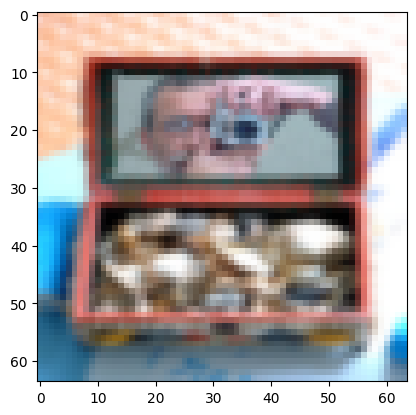

y = [1], it's a 'cat' picture.


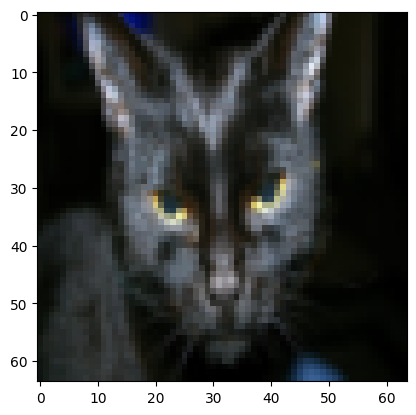

y = [0], it's a 'non-cat' picture.


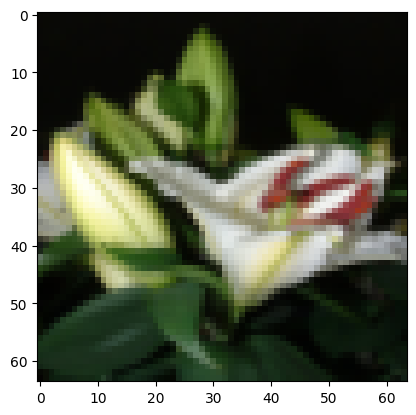

y = [1], it's a 'cat' picture.


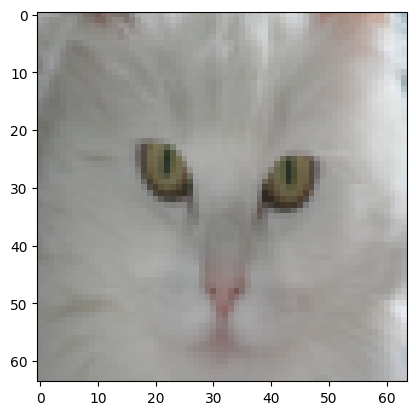

In [ ]:
for index in (15,25,4,50):
    print ("y = " + str(train_set_y_orig[index,:]) + ", it's a '" + classes[np.squeeze(train_set_y_orig[index,:])].decode("utf-8") +  "' picture.")
    plt.figure()
    plt.imshow(train_set_x_orig[index])
    plt.show()

Many software bugs in deep learning come from having matrix/vector dimensions that don't fit. If you can keep your matrix/vector dimensions straight you will go a long way toward eliminating many bugs.



#### **Exercise:**

Find the values for:

- m_train (number of training examples)
- m_test (number of test examples)
- num_px (number of pixel height or width, since they are squares, of a training image)

Remember that `train_set_x_orig` is a numpy-array of shape (m_train, num_px, num_px, 3).

In [ ]:
### START CODE HERE ### (≈ 3 lines of code)




### END CODE HERE ###

print ("Number of training examples: m_train = " + str(m_train))
print ("Number of testing examples: m_test = " + str(m_test))
print ("Height/Width of each image: num_px = " + str(num_px))
print("\n")
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_set_x shape: " + str(train_set_x_orig.shape))
print ("train_set_y shape: " + str(train_set_y_orig.shape))
print ("test_set_x shape: " + str(test_set_x_orig.shape))
print ("test_set_y shape: " + str(test_set_y_orig.shape))

Number of training examples: m_train = 209
Number of testing examples: m_test = 50
Height/Width of each image: num_px = 64


Each image is of size: (64, 64, 3)
train_set_x shape: (209, 64, 64, 3)
train_set_y shape: (209, 1)
test_set_x shape: (50, 64, 64, 3)
test_set_y shape: (50, 1)


**Expected Output:**

```
Number of training examples: m_train = 209
Number of testing examples: m_test = 50
Height/Width of each image: num_px = 64

Each image is of size: (64, 64, 3)
train_set_x shape: (209, 64, 64, 3)
train_set_y shape: (209, 1)
test_set_x shape: (50, 64, 64, 3)
test_set_y shape: (50, 1)
```





For convenience, you should now reshape images of shape (num_px, num_px, 3) in a numpy-array of shape (num_px $*$ num_px $*$ 3, 1). After this, our training (and test) dataset is a numpy-array where each row represents a flattened image. There should be m_train (respectively m_test) rows.


#### **Exercise:**

Reshape the training AND test data sets so that images of size (num_px, num_px, 3) are flattened into single vectors of shape (num\_px $*$ num\_px $*$ 3, 1).

A trick when you want to flatten a matrix X of shape (a,b,c,d) to a matrix X_flatten of shape (b$*$c$*$d, a) is to use:
```python
X_flatten = X.reshape(X.shape[0], -1)   
# The "-1" makes reshape flatten the remaining dimensions
```

In [ ]:
# Reshape the training AND test examples

### START CODE HERE ### (≈ 2 lines of code)




### END CODE HERE ###


print ("train_set_x_flatten shape: " + str(train_set_x_flatten.shape))
print ("train_set_y shape: " + str(train_set_y_orig.shape))
print ("test_set_x_flatten shape: " + str(test_set_x_flatten.shape))
print ("test_set_y shape: " + str(test_set_y_orig.shape))
print ("Lets check: " + str(train_set_x_flatten[0,0:5]))

train_set_x_flatten shape: (209, 12288)
train_set_y shape: (209, 1)
test_set_x_flatten shape: (50, 12288)
test_set_y shape: (50, 1)
Lets check: [17 31 56 22 33]


**Expected Output**:

```
train_set_x_flatten shape: (209, 12288)
train_set_y shape: (209, 1)
test_set_x_flatten shape: (50, 12288)
test_set_y shape: (50, 1)
Lets check: [17 31 56 22 33]
```



To represent color images, the red, green and blue channels (RGB) must be specified for each pixel, and so the pixel value is actually a vector of three numbers ranging from 0 to 255.

One common preprocessing step in machine learning is to center and standardize your dataset, meaning that you substract the mean of the whole numpy array from each example, and then divide each example by the standard deviation of the whole numpy array.

But for picture datasets, it is simpler and more convenient and works almost as well to just divide every row of the dataset by 255 (the maximum value of a pixel channel).


Let's standardize our dataset.

In [ ]:
train_set_x = train_set_x_flatten/255.
test_set_x = test_set_x_flatten/255


What you need to remember:

Common steps for pre-processing a new dataset are:
- Figure out the dimensions and shapes of the problem (m_train, m_test, num_px, ...)
- Reshape the datasets such that each example is now a vector of size (num_px \* num_px \* 3, 1)
- "Standardize" the data

## 2 - General Architecture of the learning algorithm ##

It's time to design a simple algorithm to distinguish cat images from non-cat images (i.e., binary classifier). You will build a Logistic Regression, using a Neural Network mindset.

<br>

**Mathematical expression of the algorithm**:

For one example $x^{(i)}$:
$$z^{(i)} = x^{(i)}w + b \tag{1}$$
$$\hat{y}^{(i)} = a^{(i)} = sigmoid(z^{(i)})\tag{2}$$
$$ \mathcal{L}(a^{(i)}, y^{(i)}) =  - y^{(i)}  \log(a^{(i)}) - (1-y^{(i)} )  \log(1-a^{(i)})\tag{3}$$

The cost is then computed by summing over all training examples:
$$ J = \frac{1}{m} \sum_{i=1}^m \mathcal{L}(a^{(i)}, y^{(i)})\tag{4}$$
<br>


**Key steps**:
In this exercise, you will carry out the following steps:
- Initialize the parameters of the model
- Learn the parameters for the model by minimizing the cost  
- Use the learned parameters to make predictions (on the test set)
- Analyse the results and conclude


### 2.1 - Building the parts of our algorithm ##

The main steps for building a Neural Network are:
1. Define the model structure (such as number of input features)
2. Initialize the model's parameters
3. Loop:
    - Calculate current loss (forward propagation)
    - Calculate current gradient (backward propagation)
    - Update parameters (gradient descent)

You often build 1-3 separately and integrate them into one function we call `model()`.




#### **Exercise**:

Once again, lets implement a `sigmoid()` functions.
$$sigmoid( XW + b) = \frac{1}{1 + e^{-(XW + b)}}$$
<br>
$$sigmoid(z) = \frac{1}{1 + e^{-(z)}}$$

In [ ]:
def sigmoid(z):
    """
    Compute the sigmoid of z

    Arguments:
    z -- A scalar or numpy array of any size.

    Return:
    g -- sigmoid(z)
    """

    ###===== START CODE HERE =======### (≈ 1 line of code)



    ###=====  END CODE HERE =======###

    return g

Lets test it out

In [ ]:
print ("sigmoid([0, 2]) = " + str(sigmoid(np.array([0,2]))))

sigmoid([0, 2]) = [0.5        0.88079708]


Expected Output:



```
sigmoid([0, 2]) = [0.5        0.88079708]
```



### 2.2 - Initializing parameters



####**Exercise:**
Implement in the cell below `initialize_with_zeros` to do parameter initialization. You have to initialize w as a vector of zeros.

Hint: look at `np.zeros()`

In [ ]:
def initialize_with_zeros(dim):
    """
    This function creates a vector of zeros of shape (dim, 1) for w and initializes b to 0.

    Argument:
    dim -- size of the w vector we want (or number of parameters in this case)

    Returns:
    w -- initialized vector of shape (dim x 1)
    b -- initialized scalar (corresponds to the bias)
    """

    ###===== START CODE HERE =======### (≈ 1 line of code)



    ###======= END CODE HERE =====###

    return w, b

In [ ]:
dim = 2
w, b = initialize_with_zeros(dim)
print ("w = \n" + str(w))
print ("b = " + str(b))

w = 
[[0.]
 [0.]]
b = 0


Expected Output:


```
w = [[0.]
    [0.]]
b = 0
```



For image inputs, w will be of shape (1, num_px $\times$ num_px $\times$ 3).

### 2.3 - Forward and Backward propagation

Now that your parameters are initialized, you can do the "forward" and "backward" propagation steps for learning the parameters.





#### **Exercise:**

Implement a function `propagate()` that computes the cost function and its gradient.

**Hints**:

Forward Propagation:
- You get X
- You compute:<br>
 $A = \sigma(XW + b)$  which is a $(m \times 1)$ matrix
- You calculate the cost function:<br>
 $J = -\frac{1}{m}\sum_{i=1}^{m}y^{(i)}\log(a^{(i)})+(1-y^{(i)})\log(1-a^{(i)})$
 <br>
    Vectorized form: <br>
$J(\theta) = -\frac{1}{m}\big((\,log\,(A)^Ty+(\,log\,(1-A)^T(1-y)\big)$

To update your model parameters you will use:

$$ \frac{\partial J}{\partial w} = \frac{1}{m}X^T(A-Y)$$
$$ \frac{\partial J}{\partial b} = \frac{1}{m} \sum_{i=1}^m (a^{(i)}-y^{(i)})$$

You can have the same partial derivate for both the weights and the bias by just making $x_0^{(i)}$=0


In [ ]:
def propagate(w, b, X, Y):
    """
    Implement the cost function and its gradient for the "forward" propagation step

    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3 , 1), that is (n x 1)
    b -- bias, a scalar
    X -- data of size (number of examples,num_px * num_px * 3), that is (m x n)
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat) of
    size ( number of examples,  1), that is (m x 1)

    Return:
    cost -- negative log-likelihood cost for logistic regression
    dw -- gradient of the loss with respect to w, thus same shape as w
    db -- gradient of the loss with respect to b, thus same shape as b

    Tips:
    - Write your code step by step for the propagation. np.log(), np.dot()
    """

    m = X.shape[0]


    ###======= START CODE HERE =========### (≈ 4 lines of code)








    ###====== END CODE HERE =======###


    #cost = np.squeeze(cost)

    grads = {"dw": dw,
             "db": db}

    return grads, cost

Lets test it out:

In [ ]:
#Lets create some fake data to test propagate
w = np.array([[1.],[2.]])
b=  2
X=  np.array([[1.,2.,-1.],[3.,4.,-3.2]]).T
Y = np.array([1,0,1]).reshape((-1,1))

grads, cost = propagate(w, b, X, Y)
print ("dw = \n" + str(grads["dw"]))
print ("db = " + str(grads["db"]))
print ("cost = " + str(cost))

dw = 
[[0.99845601]
 [2.39507239]]
db = 0.001455578136784208
cost = 5.801545319394553


**Expected Output**:

```
dw = [[0.99845601]
     [2.39507239]]
db = 0.001455578136784208   #Scalar
cost = 5.801545319394553    #Scalar
```



### 2.4 - Optimization with Batch Gradient Descent


- You have initialized your parameters.
- You are also able to compute a cost function and its gradient.
- Now, you want to update the parameters using Batch Gradient Descent.



#### **Exercise:**
Write down the optimization function. The goal is to learn w and b by minimizing the cost function J. For a parameter θ, the update rule is θ=θ−α dθ, where α is the learning rate and dθ is the derivative of the cost function with respect to θ. However, since we are using a NN mindset, instead of θs, we have weights (w) and the bias term (b)

In [ ]:
def Batch_GD(w, b, X, Y, num_iterations, learning_rate, print_cost = False):
    """
    This function optimizes w and b by running a gradient descent algorithm

    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of shape (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat), of shape (1, number of examples)
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- True to print the loss every 100 steps

    Returns:
    params -- dictionary containing the weights w and bias b
    grads -- dictionary containing the gradients of the weights and bias with respect to the cost function
    costs -- list of all the costs computed during the optimization, this will be used to plot the learning curve.

    Tips:
    You basically need to write down two steps and iterate through them:
        1) Calculate the cost and the gradient for the current parameters. Use propagate().
        2) Update the parameters using gradient descent rule for w and b.
    """

    costs = []

    for i in range(num_iterations):


        ###===== START CODE HERE ======### (≈ 5 lines of code)



        ###==== END CODE HERE =====###


        # Record the costs
        if i % 100 == 0:
            costs.append(cost)

        # Print the cost every 100 training iterations
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))

    params = {"w": w,
              "b": b}

    grads = {"dw": dw,
             "db": db}

    return params, grads, costs

In [ ]:
params, grads, costs = Batch_GD(w, b, X, Y, num_iterations= 100, learning_rate = 0.009, print_cost = False)

print ("w = \n" + str(params["w"]))
print ("b = " + str(params["b"]))
print ("dw = \n" + str(grads["dw"]))
print ("db = " + str(grads["db"]))

w = 
[[0.19033591]
 [0.12259159]]
b = 1.9253598300845747
dw = 
[[0.67752042]
 [1.41625495]]
db = 0.21919450454067657


**Expected Output**:



```
w = [[0.19033591]
    [0.12259159]]
b = 1.92535983
dw = [[0.67752042]
     [1.41625495]]
db = 0.2191945   
```



#### **Exercise:**

The previous function will output the learned w and b. We are able to use w and b to predict the labels for a dataset X. Implement the `predict()` function. There are two steps to computing predictions:

1. Calculate $\hat{Y} = A = \sigma(XW + b)$

2. Convert the entries of $\hat{Y}$ into 0 (if activation <= 0.5) or 1 (if activation > 0.5), stores the predictions in a vector `Y_prediction`. If you wish, you can use an `if`/`else` statement in a `for` loop (though there is also a way to vectorize this).

In [ ]:
def predict(w, b, X):
    '''
    Predict whether the label is 0 or 1 using learned logistic regression parameters (w, b)

    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of shape (number of examples, num_px * num_px * 3)

    Returns:
    Y_prediction -- a numpy array (column vector) containing all predictions (0/1) for the examples in X
    '''

    m = X.shape[0]
    Y_prediction = np.zeros((m,1))
    w = w.reshape(X.shape[1], 1)


    ###==== START CODE HERE ====### (≈ 2 line of code)








    ###==== END CODE HERE ====###
    return Y_prediction

Lets test it:

In [ ]:
w = np.array([[0.1124579],[0.23106775]])
b = -0.3
X = np.array([[1.,-1.1,-3.2],[1.2,2.,0.1]]).T
print ("predictions = \n" + str(predict(w, b, X)))

predictions = 
[[1.]
 [1.]
 [0.]]


**Expected Output**:



```
# This is formatted as codepredictions =
[[1.]
 [1.]
 [0.]]
```




**What to remember:**

You've implemented several functions that:

- Initialize (w,b)

- Optimize the loss iteratively to learn parameters (w,b):

    - computing the cost and its gradient

    - updating the parameters using gradient descent

- Use the learned (w,b) to predict the labels for a given set of examples


## 3 - Merge all functions into a model ##

You will now see how the overall model is structured by putting together all the building blocks (functions implemented in the previous parts) together, in the right order.



#### **Exercise:**

Implement the model function. Use the following notation:
- Y_prediction_test for your predictions on the test set
- Y_prediction_train for your predictions on the train set
- w, costs, grads for the outputs of Batch_GD()

In [ ]:
def model(X_train, Y_train, X_test, Y_test, num_iterations = 2000, learning_rate = 0.5, print_cost = False):
    """
    Builds the logistic regression model by calling the function you've implemented previously

    Arguments:
    X_train -- training set represented by a numpy array of shape (m_train,num_px * num_px * 3)
    Y_train -- training labels represented by a numpy array (column vector) of shape (m_train, 1)
    X_test -- test set represented by a numpy array of shape (m_test, num_px * num_px * 3)
    Y_test -- test labels represented by a numpy array (column vector) of shape (m_test, 1)
    num_iterations -- hyperparameter representing the number of iterations to optimize the parameters
    learning_rate -- hyperparameter representing the learning rate used in the update rule of optimize()
    print_cost -- Set to true to print the cost every 100 iterations

    Returns:
    d -- dictionary containing information about the model.
    """

    ###===== START CODE HERE =====###(≈ 6 line of code)











    ###==== END CODE HERE ====###

    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))


    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test,
         "Y_prediction_train" : Y_prediction_train,
         "w" : w,
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}

    return d

Run the following cell to train your model.

In [ ]:
d = model(train_set_x, train_set_y_orig, test_set_x, test_set_y_orig, num_iterations = 2000, learning_rate = 0.005, print_cost = True)

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.584508
Cost after iteration 200: 0.466949
Cost after iteration 300: 0.376007
Cost after iteration 400: 0.331463
Cost after iteration 500: 0.303273
Cost after iteration 600: 0.279880
Cost after iteration 700: 0.260042
Cost after iteration 800: 0.242941
Cost after iteration 900: 0.228004
Cost after iteration 1000: 0.214820
Cost after iteration 1100: 0.203078
Cost after iteration 1200: 0.192544
Cost after iteration 1300: 0.183033
Cost after iteration 1400: 0.174399
Cost after iteration 1500: 0.166521
Cost after iteration 1600: 0.159305
Cost after iteration 1700: 0.152667
Cost after iteration 1800: 0.146542
Cost after iteration 1900: 0.140872
train accuracy: 99.04306220095694 %
test accuracy: 70.0 %


**Expected Output**:

<table style="width:40%">
    <tr>
        <td> Cost after iteration 0   </td>
        <td> 0.693147 </td>
    </tr>
      <tr>
        <td> <center> $\vdots$ </center> </td>
        <td> <center> $\vdots$ </center> </td>
    </tr>  
    </tr>
      <tr>
 <td> Cost after iteration 1900   </td>
        <td> 0.140872 </td>
    </tr>  
    <tr>
        <td> Train Accuracy  </td>
        <td> 99.04306220095694 % </td>
    </tr>
    <tr>
        <td>Test Accuracy </td>
        <td> 70.0 % </td>
    </tr>
</table>




Training accuracy is close to 100%. Your model is working and has high enough capacity to fit the training data. Test accuracy is 68%. It is actually not bad for this simple model, given the small dataset we used and that logistic regression is a linear classifier. But no worries, you'll build an even better classifier once we start using NN and Deep NN!

Also, you see that the model is clearly overfitting the training data. Later you will learn how to reduce overfitting, for example by using regularization in NN. Using the code below (and changing the `index` variable) you can look at predictions on pictures of the test set.

y = 1, you predicted that it is a "cat" picture.


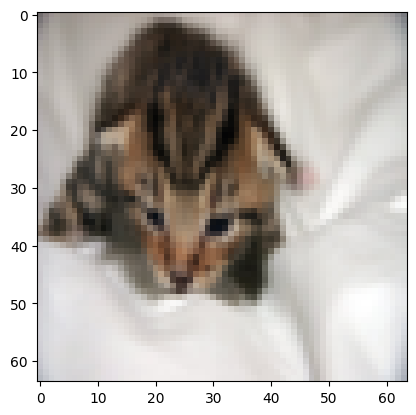

y = 1, you predicted that it is a "cat" picture.


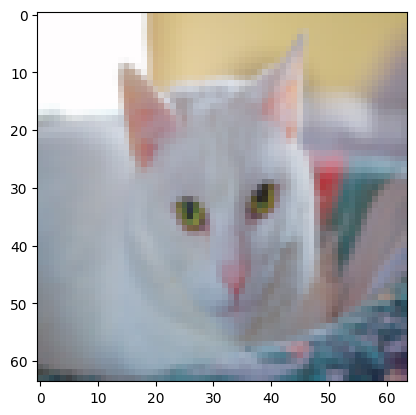

y = 1, you predicted that it is a "cat" picture.


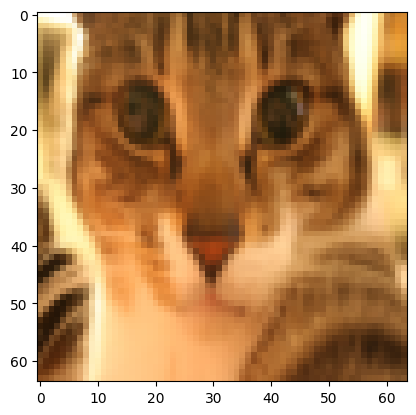

y = 1, you predicted that it is a "cat" picture.


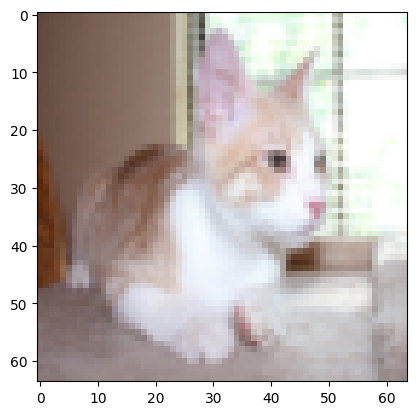

y = 0, you predicted that it is a "cat" picture.


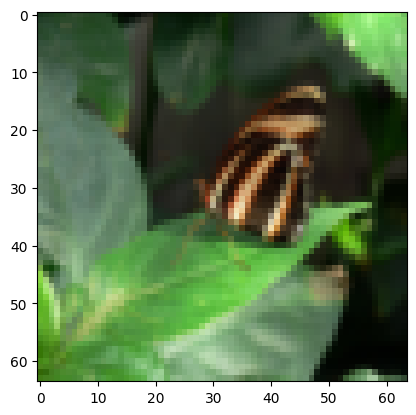

y = 1, you predicted that it is a "non-cat" picture.


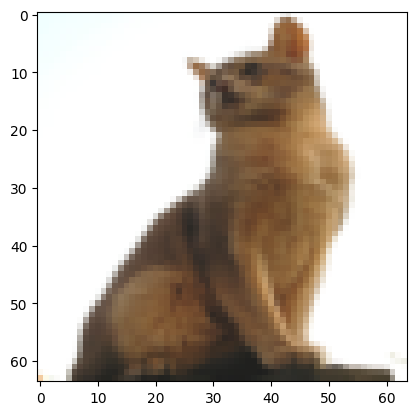

In [ ]:
for index in range(1,7):
  print ("y = " + str(test_set_y_orig[index,0]) + ", you predicted that it is a \"" + classes[int(d["Y_prediction_test"][index,0])].decode("utf-8") +  "\" picture.")
  plt.figure()
  plt.imshow(test_set_x[index,:].reshape((num_px, num_px, 3)))
  plt.show()


Let's also plot the cost function and the gradients.

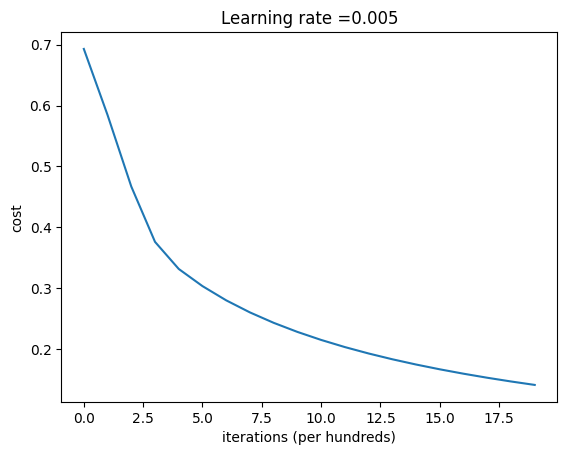

In [ ]:
# Plot learning curve (with costs)
costs = np.squeeze(d['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(d["learning_rate"]))
plt.show()

**Interpretation**:

You can see the cost decreasing. It shows that the parameters are being learned. However, you see that you could train the model even more on the training set. Try to increase the number of iterations in the cell above and rerun the cells. You might see that the training set accuracy goes up, but the test set accuracy goes down. This is  overfitting!!

### 4 - Choice of learning rate  ##

Congratulations on building your first image classification model. Let's analyze it further, and examine possible choices for the learning rate $\alpha$.



**Reminder**:
In order for Batch Gradient Descent to work you must choose the learning rate wisely. The learning rate $\alpha$  determines how rapidly we update the parameters. If the learning rate is too large we may "overshoot" the optimal value. Similarly, if it is too small we will need too many iterations to converge to the best values. That's why it is crucial to use a well-tuned learning rate.

Let's compare the learning curve of our model with several choices of learning rates. Run the cell below. This should take about 1 minute. Feel free also to try different values than the three we have initialized the `learning_rates` variable to contain, and see what happens.

learning rate is: 0.01
train accuracy: 99.52153110047847 %
test accuracy: 68.0 %

-------------------------------------------------------

learning rate is: 0.001
train accuracy: 88.99521531100478 %
test accuracy: 64.0 %

-------------------------------------------------------

learning rate is: 0.0001
train accuracy: 68.42105263157895 %
test accuracy: 36.0 %

-------------------------------------------------------



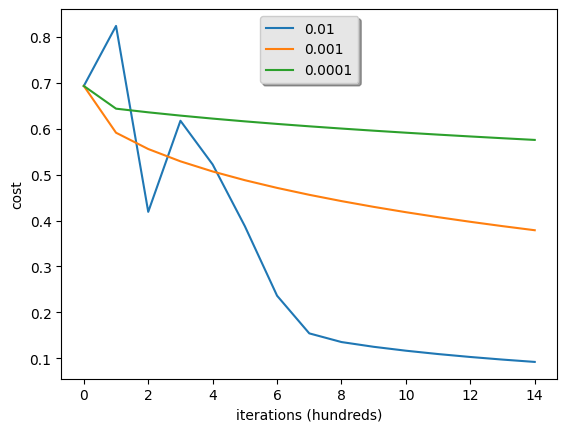

In [ ]:
learning_rates = [0.01, 0.001, 0.0001]
models = {}
for i in learning_rates:
    print ("learning rate is: " + str(i))
    models[str(i)] = model(train_set_x, train_set_y_orig, test_set_x, test_set_y_orig, num_iterations = 1500, learning_rate = i, print_cost = False)
    print ('\n' + "-------------------------------------------------------" + '\n')

for i in learning_rates:
    plt.plot(np.squeeze(models[str(i)]["costs"]), label= str(models[str(i)]["learning_rate"]))

plt.ylabel('cost')
plt.xlabel('iterations (hundreds)')

legend = plt.legend(loc='upper center', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.show()

**Interpretation**:
- Different learning rates give different costs and thus different predictions results.
- If the learning rate is too large (0.01), the cost may oscillate up and down. It may even diverge (though in this example, using 0.01 still eventually ends up at a good value for the cost).
- A lower cost doesn't mean a better model. You have to check if there is possibly overfitting. It happens when the training accuracy is a lot higher than the test accuracy.
- In deep learning, we usually recommend that you:
    - Choose the learning rate that better minimizes the cost function.
    - If your model overfits, use other techniques to reduce overfitting. (We'll talk about this in later videos.)


## 5 - Test with your own image ##



Congratulations on finishing this assignment. You can use your own image and see the output of your model. To do that:
1. Add your image to the VM of Google Colab
2. Change your image's name in the following code
3. Run the code and check if the algorithm is right (1 = cat, 0 = non-cat)!

y = 1.0, your algorithm predicts a "cat" picture.


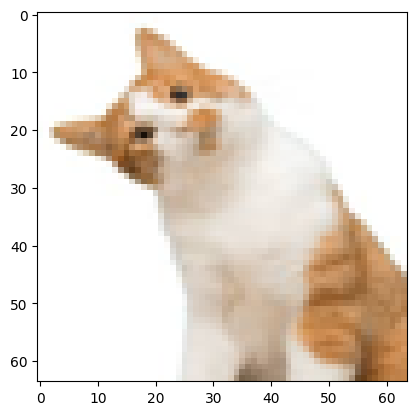

In [ ]:

#(PUT YOUR IMAGE NAME)
my_image = "cat.jpg"   # change this to the name of your image file
#my_image = "cat2.jpg"   # change this to the name of your image file

# We preprocess the image to fit your algorithm (*64*64 pixels).
fname = my_image
img = Image.open( fname )
img.show()
new_image = img.resize((num_px, num_px))
data = np.asarray(new_image, dtype="int32" )

plt.figure()
plt.imshow(data)

data=data.reshape(1,num_px*num_px*3)
data=data/255
my_predicted_image = predict(d["w"], d["b"], data)
print("y = " + str(np.squeeze(my_predicted_image)) + ", your algorithm predicts a \"" + classes[int(np.squeeze(my_predicted_image)),].decode("utf-8") +  "\" picture.")


**What to remember from this assignment:**

1. Preprocessing the dataset is important.
2. You implemented each function separately: initialize(), propagate(), optimize(). Then you built a model().
3. Tuning the learning rate (which is an example of a "hyperparameter") can make a big difference to the algorithm.

You will see more examples of this later in this course!

**References**:
- http://www.wildml.com/2015/09/implementing-a-neural-network-from-scratch/
- https://stats.stackexchange.com/questions/211436/why-do-we-normalize-images-by-subtracting-the-datasets-image-mean-and-not-the-c

###### **DO NOT DELETE NOR MODIFY THESE CODE CELLS**

In [ ]:
# # ###DO NOT DELETE NOR MODIFY THIS CODE CELL####
!wget https://raw.githubusercontent.com/lopezbec/intro_python_notebooks/main/GRADING_LogRNN.py
import numpy as np
from GRADING_LogRNN import GRADING_LogRNN



try:
    m_train
except:
    m_train=None
try:
    m_test
except:
    m_test=None
try:
    train_set_x_flatten
except:
    train_set_x_flatten=None
try:
    sigmoid
    sigmoid_in=sigmoid(np.array([0,2,3]))[2]
except:
    sigmoid=None
    sigmoid_in=None
try:
    initialize_with_zeros
except:
    initialize_with_zeros=None
try:
    propagate
    propagate_in=propagate(np.array([[1.],[2.]]) , 2, np.array([[1.,2.,-1.],[3.,4.,-3.2]]).T, np.array([0,0,1]).reshape((-1,1)))[1]
except:
    propagate=None
    propagate_in=None
try:
    params
except:
    params=None
try:
    predict
    predict_in=predict(np.array([[0.1124579],[0.23106775]]), -0.5,np.array([[1.,-1.1,-3.2],[1.2,2.,0.1]]).T)[0,0]
except:
    predict=None
    predict_in=None
try:
    d
except:
    d=None

GRADING_LogRNN(m_train, m_test,train_set_x_flatten,sigmoid_in,initialize_with_zeros,propagate_in,params,predict_in,d)
